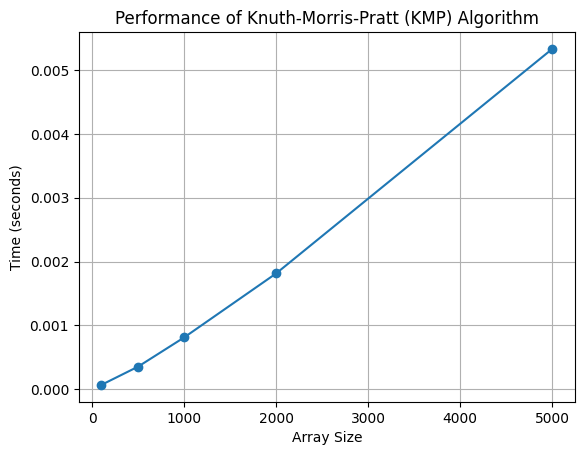

In [1]:
import timeit
import matplotlib.pyplot as plt

def kmp_search(text, pattern):
    n = len(text)
    m = len(pattern)
    prefix_table = compute_prefix_table(pattern)
    occurrences = []

    j = 0
    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = prefix_table[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            occurrences.append(i - m + 1)
            j = prefix_table[j - 1]

    return occurrences

def compute_prefix_table(pattern):
    m = len(pattern)
    prefix_table = [0] * m
    k = 0

    for i in range(1, m):
        while k > 0 and pattern[i] != pattern[k]:
            k = prefix_table[k - 1]
        if pattern[i] == pattern[k]:
            k += 1
        prefix_table[i] = k

    return prefix_table

def benchmark_kmp(text, pattern, iterations):
    stmt = "kmp_search(text, pattern)"
    setup = "from __main__ import kmp_search, text, pattern"
    time_taken = timeit.timeit(stmt, setup, number=iterations)
    return time_taken / iterations

# Different array sizes for benchmarking
array_sizes = [100, 500, 1000, 2000, 5000]

# Benchmarking KMP for each array size
times = []
for size in array_sizes:
    text = "A" * size
    pattern = "A" * (size // 10)
    kmp_time = benchmark_kmp(text, pattern, 100)
    times.append(kmp_time)

# Plotting
plt.plot(array_sizes, times, marker='o', linestyle='-')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Performance of Knuth-Morris-Pratt (KMP) Algorithm')
plt.grid(True)
plt.show()
